<a href="https://colab.research.google.com/github/Ziedny28/ML/blob/master/Kuis2-create%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
import os
os.chdir('/content/drive/My Drive/ML-Resources/training_data')

## Persiapan Dataset

In [61]:
import cv2
import numpy as np
from tqdm import tqdm
import os

# Define your desired image width and height
your_image_width = 28
your_image_height = 28

data = []
labels = []

# Assuming the code is in the directory where the images are located
current_directory = '/content/drive/My Drive/ML-Resources/training_data'

for folder_name in os.listdir(current_directory):
    folder_path = os.path.join(current_directory, folder_name)

    i = 0
    for img_name in tqdm(os.listdir(folder_path)):
        i = i + 1
        if i == 574:
          break
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (your_image_width, your_image_height))
        data.append(img)
        labels.append(folder_name)

data = np.array(data)
labels = np.array(labels)


100%|█████████▉| 573/575 [00:01<00:00, 414.94it/s]


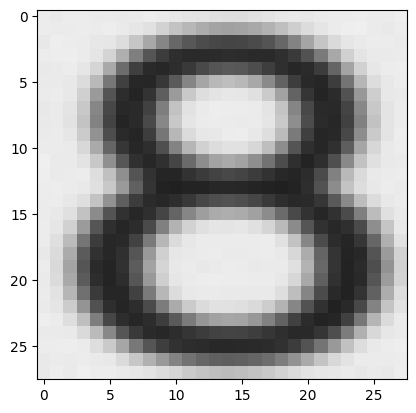

In [62]:
plt.imshow(data[0])

In [63]:
labels[0]

'8'

In [64]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Preprocessing

In [65]:
# Load and preprocess grayscale images
data_gray = []

for folder_name in os.listdir(current_directory):
    folder_path = os.path.join(current_directory, folder_name)

    i = 0
    for img_name in tqdm(os.listdir(folder_path)):
        i = i + 1
        if i == 574:
          break
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load image as grayscale
        img = cv2.resize(img, (your_image_width, your_image_height))
        data_gray.append(img)

data_gray = np.array(data_gray)
labels = np.array(labels)

# Normalize pixel values to be between 0 and 1
data_gray = data_gray.astype('float32') / 255.0

# Reshape data to include channel dimension
data_gray = data_gray.reshape((data_gray.shape[0], your_image_width, your_image_height, 1))


100%|█████████▉| 573/575 [00:00<00:00, 632.29it/s]


## Encode

In [66]:
# Convert labels to one-hot encoding using LabelEncoder
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
num_classes = len(label_encoder.classes_)
labels_one_hot = to_categorical(labels_encoded, num_classes=num_classes)


# Split the data into training and testing sets
X_train_gray, X_test_gray, y_train, y_test = train_test_split(data_gray, labels_one_hot, test_size=0.2, random_state=42)

## Augmentation

In [67]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [68]:
datagen.fit(data)  # Fit the data augmentation pipeline to the reshaped training data

## Build CNN Model

In [74]:
num_classes= 35

In [75]:
# Build CNN Model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(your_image_width, your_image_height, 1)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))  # Using softmax for multi-class classification

# Compile the model
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['accuracy'])

# Train the model with data augmentation
batch_size = 32
history = model.fit(datagen.flow(X_train_gray, y_train, batch_size=batch_size),
                    steps_per_epoch=len(X_train_gray) // batch_size,
                    epochs=20,
                    validation_data=(X_test_gray, y_test),
                    shuffle=True)

# Save the model to an HDF5 file
model.save('/content/drive/My Drive/ML-Resources/my_model.h5')

Epoch 1/20
496/496 [==============================] - 10s 15ms/step - loss: 2.9684 - accuracy: 0.1445 - val_loss: 1.7418 - val_accuracy: 0.4681
Epoch 2/20
496/496 [==============================] - 8s 16ms/step - loss: 2.1122 - accuracy: 0.3281 - val_loss: 1.3085 - val_accuracy: 0.6064
Epoch 3/20
496/496 [==============================] - 7s 14ms/step - loss: 1.8234 - accuracy: 0.4060 - val_loss: 1.0927 - val_accuracy: 0.6393
Epoch 4/20
496/496 [==============================] - 8s 17ms/step - loss: 1.6209 - accuracy: 0.4715 - val_loss: 0.9841 - val_accuracy: 0.6816
Epoch 5/20
496/496 [==============================] - 7s 15ms/step - loss: 1.4992 - accuracy: 0.5100 - val_loss: 0.8334 - val_accuracy: 0.7387
Epoch 6/20
496/496 [==============================] - 7s 13ms/step - loss: 1.4048 - accuracy: 0.5421 - val_loss: 0.7926 - val_accuracy: 0.7470
Epoch 7/20
496/496 [==============================] - 8s 17ms/step - loss: 1.3365 - accuracy: 0.5616 - val_loss: 0.7399 - val_accuracy: 0.771

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Test Data

In [78]:
# Assuming you have X_test_gray and y_test from the previous code
# Ensure the input shape matches the model's input shape
X_test_gray = X_test_gray.reshape((X_test_gray.shape[0], your_image_width, your_image_height, 1))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_gray, y_test)

print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Make predictions on a few samples
num_samples_to_predict = 5
sample_indices = np.random.choice(len(X_test_gray), num_samples_to_predict, replace=False)

for idx in sample_indices:
    sample = X_test_gray[idx].reshape(1, your_image_width, your_image_height, 1)
    true_label = np.argmax(y_test[idx])  # Use argmax to get the index of the true label

    # Predict the class probabilities
    predictions = model.predict(sample)
    predicted_label = np.argmax(predictions)

    print(f'\nSample {idx + 1}:')
    print(f'True Label: {true_label}')
    print(f'Predicted Label: {predicted_label}')
    print(f'Class Probabilities: {predictions}')


125/125 [==============================] - 0s 3ms/step - loss: 0.5628 - accuracy: 0.8056
Test Loss: 0.5628
Test Accuracy: 80.56%
1/1 [==============================] - 0s 175ms/step

Sample 3037:
True Label: 14
Predicted Label: 14
Class Probabilities: [[2.01470971e-06 3.92459668e-07 1.55460361e-06 1.13721344e-05
  3.84675417e-07 5.27578406e-04 1.12921145e-04 1.59839303e-07
  1.58744854e-06 7.17320887e-04 1.68266997e-05 2.60218568e-02
  2.10705662e-06 2.24357173e-05 8.58839273e-01 4.06733277e-04
  1.97879854e-04 1.78396044e-06 1.21534758e-05 9.11541491e-08
  1.17597082e-07 7.29401828e-09 1.74886985e-08 1.86485568e-06
  1.05694003e-01 2.94486163e-05 7.29434006e-03 7.88867910e-05
  4.55843565e-06 1.46372914e-08 3.32915668e-08 4.15011858e-10
  1.42608383e-10 8.59642526e-08 8.64404086e-08]]
1/1 [==============================] - 0s 23ms/step

Sample 3450:
True Label: 7
Predicted Label: 7
Class Probabilities: [[2.14759368e-07 6.92932634e-04 1.12215220e-03 1.49350613e-04
  6.49931593e-08 4.17